
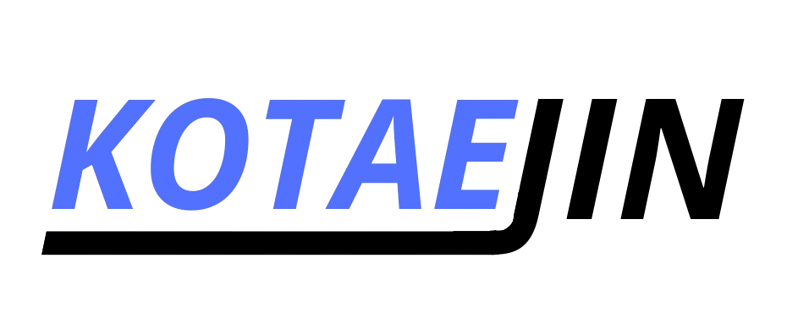

# Sum√°rio

- Descri√ß√£o do problema
 - Perguntas para serem respondidas utilizando a an√°lise explorat√≥ria
- Configura√ß√µes iniciais
 - Instalando Bibliotecas
 - Realiza√ß√£o dos imports
 - Conectando ao google drive
 - Defini√ß√£o de caminhos para a base
- An√°lise explorat√≥ria
 - Defini√ß√£o de fun√ß√µes para a an√°lise explorat√≥ria
 - Principais d√∫vidas do chat
 - Palavras que s√£o mais escritas incorretamente
 - G√≠rias mais utilizadas pelos clientes
 - Pontua√ß√µes mais frequentes nas perguntas
 - Bigramas mais frequentes nas respostas ao cliente
- Defini√ß√£o de fun√ß√µes de etapas de pr√©-processamento
 - Lendo base de dados
 - Treinando tagger floresta
 - Definindo fun√ß√µes para o pr√©-processamento
 - Testes das fun√ß√µes de pr√©-processamento
- Uso de Pipeline de pr√©-processamento
 - Defini√ß√£o da Pipeline
 - Lendo perguntas da base de dados para realiza√ß√£o de testes
 - Execu√ß√£o da pipeline
 - Exibi√ß√£o de resultados obtidos
 - Testes de valida√ß√£o de Pipeline
- Bag of Words
 - Defini√ß√£o de fun√ß√£o de vetoriza√ß√£o Bag of Words (BoW)
 - Testes Bag of Words
- RNN
 - Label Encoder
 - Formata√ß√£o de Dados Para a Rede Neural
 - Defini√ß√£o do Modelo
 - Compila√ß√£o do Modelo
 - Early Stop
 - Treinando Modelo
 - Desempenho do Modelo
 - Predi√ß√£o
- An√°lise Treinamento GPU x CPU
 - Compara√ß√£o de Resultados

# Descri√ß√£o do Problema

Conforme descrito no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), dentro do t√≥pico "Esbo√ßo do Problema" e do subt√≥pico "Problema", o Servi√ßo de Atendimento ao Cliente (SAC) enfrenta uma demanda elevada, com mais de 25 mil atendimentos mensais realizados via chat online (Live Chat) em m√∫ltiplos idiomas. Este volume de solicita√ß√µes ultrapassa a capacidade de resposta dos atendentes humanos, resultando em atrasos no atendimento e gerando insatisfa√ß√£o entre os clientes.

De acordo com o subt√≥pico "Objetivo" no [TAPI](https://drive.google.com/drive/u/1/folders/1N6OswJHbb8QLdlJ9wX9T_IU9zWtTIsNU), para enfrentar este desafio, ser√° desenvolvido um chatbot utilizando modelos abertos de IA Generativa, com foco no atendimento ao cliente. Este chatbot ser√° gerido por um grupo de usu√°rios internos, que poder√£o criar, operar e personalizar o sistema de forma cont√≠nua. Durante o projeto, um desenvolvedor da Brastel, localizado no Brasil, ser√° designado para colaborar no desenvolvimento, garantindo que os prot√≥tipos desenvolvidos possam ser efetivamente utilizados na constru√ß√£o do sistema final.


### Perguntas para An√°lise Explorat√≥ria

1. **Em qual per√≠odo do dia o chat recebe mais acessos?**
   - **Prop√≥sito:** Entender os momentos de pico de uso do chat ao longo do dia √© essencial para planejar a escalabilidade do sistema e prevenir poss√≠veis congestionamentos devido ao alto n√∫mero de acessos simult√¢neos.

2. **Quais s√£o as d√∫vidas mais frequentes entre os usu√°rios?**
   - **Prop√≥sito:** Identificar as d√∫vidas mais comuns permite configurar respostas pr√©-definidas no chatbot, otimizando o tempo de resposta e reduzindo o processamento desnecess√°rio.

3. **Qual √© a propor√ß√£o de palavras recorrentes escritas de maneira incorreta?**
   - **Prop√≥sito:** Avaliar a frequ√™ncia de erros ortogr√°ficos comuns ajuda a treinar o modelo para reconhecer e interpretar corretamente essas varia√ß√µes, melhorando a efici√™ncia do chatbot.

4. **As mensagens cont√™m muitas g√≠rias ou abrevia√ß√µes?**
   - **Prop√≥sito:** Analisar o uso de g√≠rias e abrevia√ß√µes nas mensagens √© importante, pois o modelo precisa ser treinado para entender esses termos. Identificar as mais comuns auxilia no treinamento para aumentar a precis√£o do chatbot.

5. **O uso de pontua√ß√£o √© frequente nas mensagens?**
   - **Prop√≥sito:** Compreender o padr√£o de uso de pontua√ß√£o nas mensagens ajuda a entender o estilo de comunica√ß√£o dos usu√°rios. A pontua√ß√£o pode mudar o sentido das frases, transformando uma afirma√ß√£o em uma pergunta, por exemplo, o que √© cr√≠tico para a interpreta√ß√£o correta pelo chatbot.

6. **As respostas dos usu√°rios seguem algum padr√£o espec√≠fico?**
   - **Prop√≥sito:** Identificar padr√µes nas respostas pode revelar se h√° uma repeti√ß√£o significativa de perguntas ou respostas, o que pode ser utilizado para otimizar as intera√ß√µes e treinamentos do chatbot.


#Configura√ß√µes Iniciais

In [157]:
DOWNLOAD_DF = False
DOWNLOAD_DF_NUMERIC = False
DOWNLOAD_MODEL = True

## Instalando Bibliotecas

In [158]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install -U scikit-learn
!pip install openpyxl
!pip install pyspellchecker
!pip install --upgrade tensorflow

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.0/13.0 MB 85.6 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Realiza√ß√£o dos imports


Nesta etapa, o colab √© preparado com a instala√ß√£o e importa√ß√£o de bibliotecas e pacotes necess√°rios para a execu√ß√£o do projeto.

In [159]:
import nltk
import random
import re
import spacy
import string
import time
import unittest

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from collections import Counter, defaultdict
from google.colab import files
from IPython.display import display

from nltk.corpus import stopwords, floresta
from nltk.stem import PorterStemmer, SnowballStemmer, RSLPStemmer, WordNetLemmatizer
from nltk.tag import pos_tag, UnigramTagger
from nltk.tokenize import sent_tokenize, word_tokenize

from spellchecker import SpellChecker
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dropout, Dense, Layer, SimpleRNN, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam



nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('maxent_ne_chunker')
nlp = spacy.load("pt_core_news_sm")
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package floresta to /root/nltk_data...
[nltk_data]   Package floresta is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   

True

## Conectando ao google drive

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Defini√ß√£o de caminhos para a base

In [161]:
DEFAULT_XLS_PATH = "/content/drive/MyDrive/m11/data/chat_clients.xlsx"
DEFAULT_CSV_PATH = "/content/drive/MyDrive/m11/data/augmented_data.csv"

def get_file_paths():
    xls_path = input(f"Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padr√£o): ")
    xls_path = xls_path if xls_path.strip() else DEFAULT_XLS_PATH

    csv_path = input(f"Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padr√£o): ")
    csv_path = csv_path if csv_path.strip() else DEFAULT_CSV_PATH

    return xls_path, csv_path

XLS_PATH, CSV_PATH = get_file_paths()

Digite o caminho do arquivo Excel (ou pressione Enter para usar o caminho padr√£o): 
Digite o caminho do arquivo CSV (ou pressione Enter para usar o caminho padr√£o): 


#An√°lise explorat√≥ria

## Defini√ß√£o de fun√ß√µes para a an√°lise explorat√≥ria

In [162]:
def remocao_stopword(text):
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def conversao_minuscula(text):
    try:
        text = text.lower()
    except:
        pass
    return text

def encontrar_erros(texto):
    spell = SpellChecker(language='pt')
    palavras = texto.split()
    palavras_erradas = spell.unknown(palavras)
    return palavras_erradas

def limpar_sentenca(sentence: str) -> str:
    cleaned_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence)
    return cleaned_sentence

def verificar_giras_abreviacoes(texto, giras_abreviacoes):
    palavras = texto.lower().split()
    giras_encontradas = [palavra for palavra in palavras if palavra in giras_abreviacoes]
    return giras_encontradas

def contar_pontuacoes(texto):
    pontuacoes = re.findall(r'[^\w\s]', texto)
    return pontuacoes

def encontrar_bigramas(texto):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform([texto])
    bigramas = vectorizer.get_feature_names_out()
    frequencias = bag_of_words.toarray().sum(axis=0)
    return dict(zip(bigramas, frequencias))

In [163]:
df_filtrado = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]
df_filtrado.rename(columns={'Resposta\n': 'Resposta'}, inplace=True)

df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(limpar_sentenca)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(remocao_stopword)
df_filtrado['Pergunta'] = df_filtrado['Pergunta'].apply(conversao_minuscula)
df_filtrado['Intencao'] = df_filtrado['Intencao'].apply(conversao_minuscula)
df_filtrado['Resposta'] = df_filtrado['Resposta'].apply(conversao_minuscula)


df_filtrado

Intencao  \
0                          como depositar   
1                      como fazer remessa   
2                        tempo de remessa   
3    pedido de envio via metodo "byphone"   
4    pedido de envio via metodo "byphone"   
..                                    ...   
500       atualizacao de dados cadastrais   
501            tempo de entrega do cartao   
502                          cancelamento   
503                             reembolso   
504                  problemas de remessa   

                                              Pergunta  \
0    boa diatudo bemeu gostaria saber sobre caixa f...   
1                            como enviar dinheiro japo   
2      quanto tempo levar beneficirio receber dinheiro   
3    boa tarde acabei fazer transferncia 2223 total...   
4    poderia fazer remessa 22yenes bbb rrr obrigado...   
..                                                 ...   
500                 boa tarde fao fazer mudana endereo   
501  bom dia consegui fazer depsito carto ainda che...   
502  boa noitea beneficiria avisou conta est errado...   
503  boa noite eu fiz depsito errado pra depositar ...   
504  ola recebi ligao central vocs tokyo avisando d...   

                                              Resposta  
0    bom dia! sim, o sr pode utilizar o cart√£o de d...  
1    para se inscrever no servi√ßo de remessa, por f...  
2    via de regra, as remessas ser√£o pagas via pix ...  
3    iremos processar a sua solicitacao.\nmuito obr...  
4    iremos processar a sua solicitacao.\nmuito obr...  
..                                                 ...  
500  a senhora pode trocar pelo pr√≥prio app da bras...  
501  boa noite\no sr solicitou dia 28. ser√° entregu...  
502  sim, podemos cancelar\no valor voltar√° no seu ...  
503  √© poss√≠vel solicitar o reembolso diretamente d...  
504  enviamos a corre√ß√£o ao nosso correspondente do...  

[505 rows x 3 columns]

## Principais d√∫vidas do chat

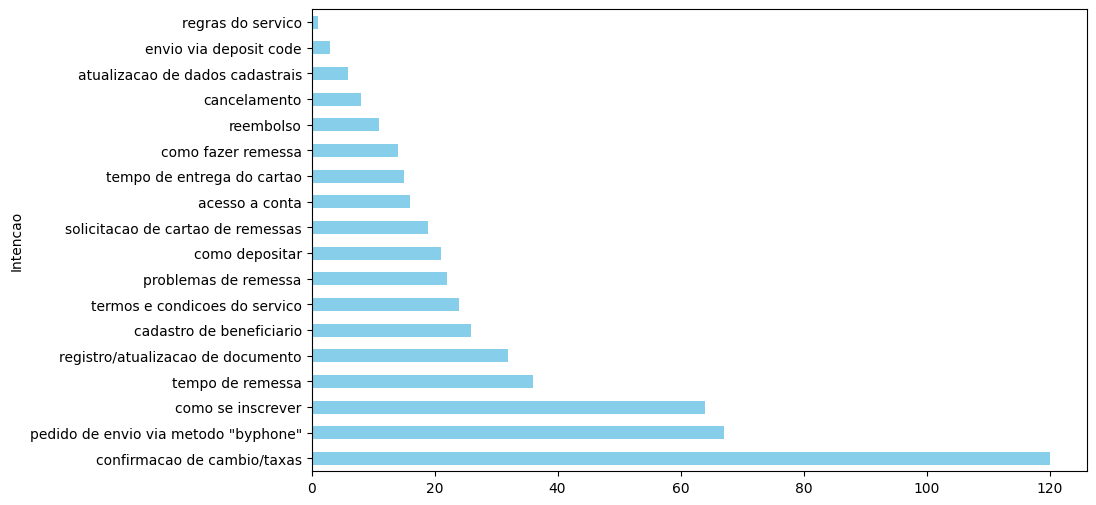

In [164]:
contagem = df_filtrado['Intencao'].value_counts()
plt.figure(figsize=(10, 6))
contagem.plot(kind='barh', color='skyblue')

plt.show()

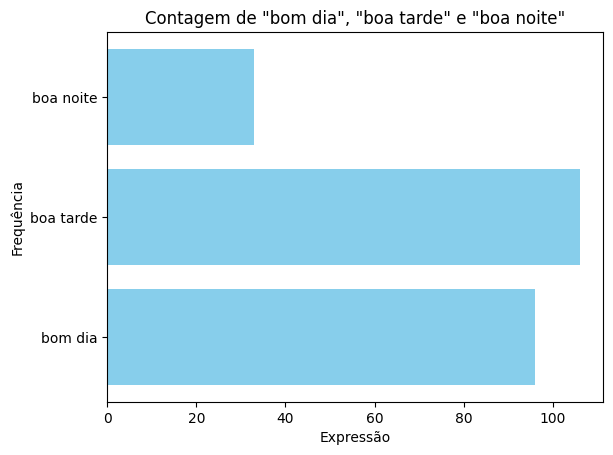

In [165]:
data = {
    'mensagens': [
        'bom dia',
        'boa tarde',
        'boa noite'
    ]
}

df = pd.DataFrame(data)

contagem = {
    'bom dia': df_filtrado['Pergunta'].str.contains('bom dia', case=False).sum(),
    'boa tarde': df_filtrado['Pergunta'].str.contains('boa tarde', case=False).sum(),
    'boa noite': df_filtrado['Pergunta'].str.contains('boa noite', case=False).sum()
}

plt.barh(list(contagem.keys()), list(contagem.values()), color=['skyblue'])
plt.xlabel('Express√£o')
plt.ylabel('Frequ√™ncia')
plt.title('Contagem de "bom dia", "boa tarde" e "boa noite"')
plt.show()

## Palavras que s√£o mais escritas incorretamente

In [166]:
spell = SpellChecker(language='pt')
stop_words = set(stopwords.words('portuguese'))


def preprocessar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return texto

def encontrar_erros(texto):
    texto = preprocessar_texto(texto)
    palavras = texto.split()
    erros = [palavra for palavra in palavras if palavra not in stop_words and palavra not in spell]
    return erros

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

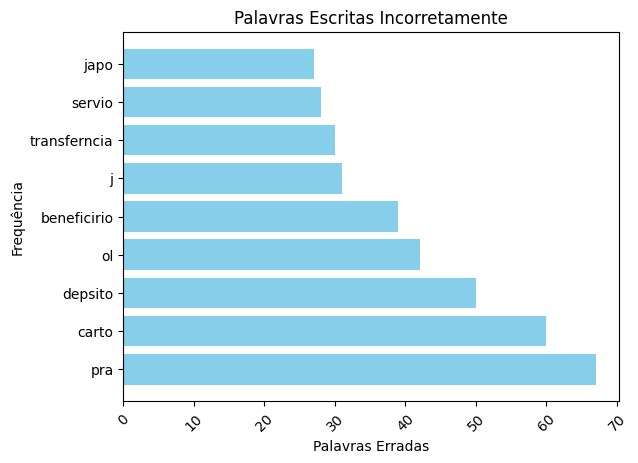

In [167]:
df_filtrado['erros'] = df_filtrado['Pergunta'].apply(lambda x: encontrar_erros(x))
todos_erros = [erro for sublist in df_filtrado['erros'] for erro in sublist]
contagem_erros = Counter(todos_erros)
top_erros = contagem_erros.most_common(10)[1:]
palavras, frequencias = zip(*top_erros)
plt.barh(list(palavras), list(frequencias), color='skyblue')
plt.xlabel('Palavras Erradas')
plt.ylabel('Frequ√™ncia')
plt.title('Palavras Escritas Incorretamente')
plt.xticks(rotation=45)

## G√≠rias mais utilizadas pelos clientes

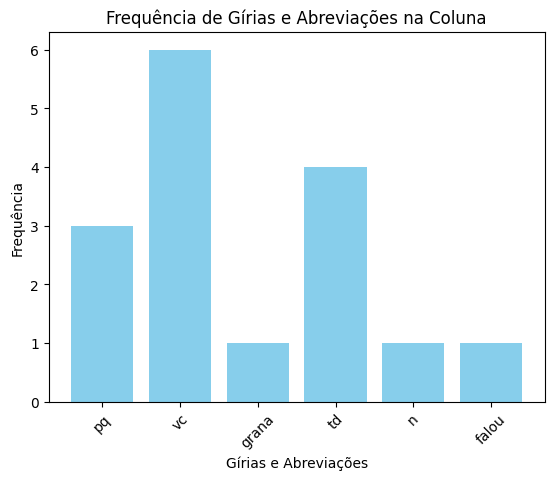

In [168]:
giras_abreviacoes = [
    "rol√™", "zoar", "dahora", "massa", "mano", "man", "bicho", "treta", "falou",
    "sussa", "balada", "perifa", "bagulho", "cabuloso", "grana", "leco",
    "vc", "tb", "blz", "qnd", "pq", "ctz", "fds", "tbm", "mt", "flw", "n",
    "td", "tlg", "t√°", "lol", "brb", "omg", "btw", "asap"
]

df_filtrado['giras_encontradas'] = df_filtrado['Pergunta'].apply(lambda x: verificar_giras_abreviacoes(x, giras_abreviacoes))

todos_giras = [giria for sublist in df_filtrado['giras_encontradas'] for giria in sublist]
contagem_giras = Counter(todos_giras)

plt.bar(contagem_giras.keys(), contagem_giras.values(), color='skyblue')
plt.xlabel('G√≠rias e Abrevia√ß√µes')
plt.ylabel('Frequ√™ncia')
plt.title('Frequ√™ncia de G√≠rias e Abrevia√ß√µes na Coluna')
plt.xticks(rotation=45)
plt.show()

## Pontua√ß√µes mais frequentes nas perguntas

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


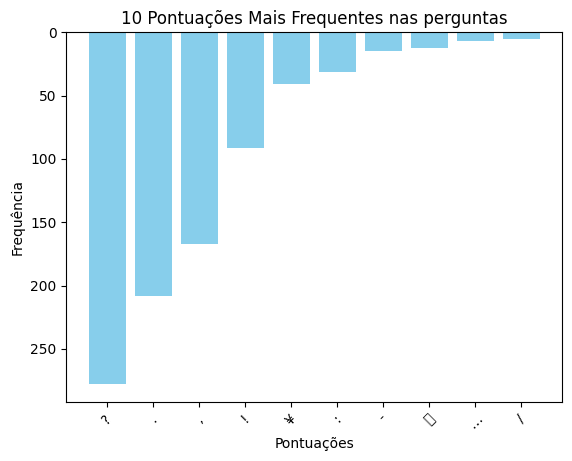

In [169]:
df = pd.read_excel(XLS_PATH)[['Intencao', 'Pergunta', 'Resposta\n']]

df['pontuacoes'] = df['Pergunta'].apply(contar_pontuacoes)

todas_pontuacoes = [ponto for sublist in df['pontuacoes'] for ponto in sublist]
contagem_pontuacoes = Counter(todas_pontuacoes)

top_10_pontuacoes = contagem_pontuacoes.most_common(10)

pontuacoes, frequencias = zip(*top_10_pontuacoes)

plt.bar(pontuacoes, frequencias, color='skyblue')
plt.xlabel('Pontua√ß√µes')
plt.ylabel('Frequ√™ncia')
plt.title('10 Pontua√ß√µes Mais Frequentes nas perguntas')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

## Bigramas mais frequentes nas respostas ao cliente

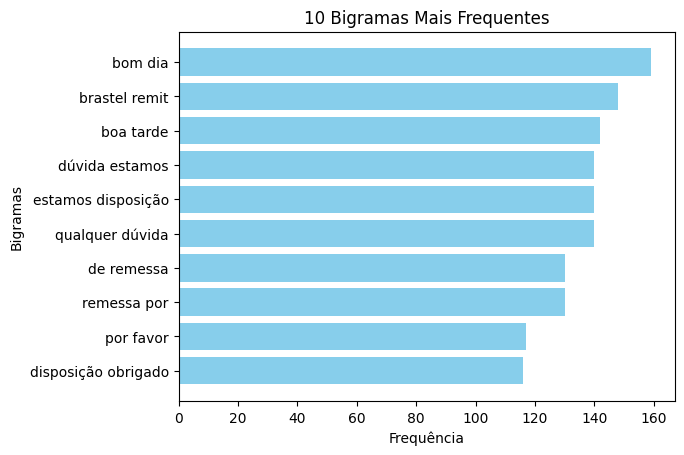

In [170]:
df['Resposta\n'] = df['Resposta\n'].fillna('')

todos_bigramas = Counter()
for texto in df['Resposta\n']:
    try:
        bigramas = encontrar_bigramas(texto)
        todos_bigramas.update(bigramas)
    except:
        pass

top_10_bigramas = todos_bigramas.most_common(10)

bigramas, frequencias = zip(*top_10_bigramas)

plt.barh(bigramas, frequencias, color='skyblue')
plt.xlabel('Frequ√™ncia')
plt.ylabel('Bigramas')
plt.title('10 Bigramas Mais Frequentes')
plt.gca().invert_yaxis()
plt.show()

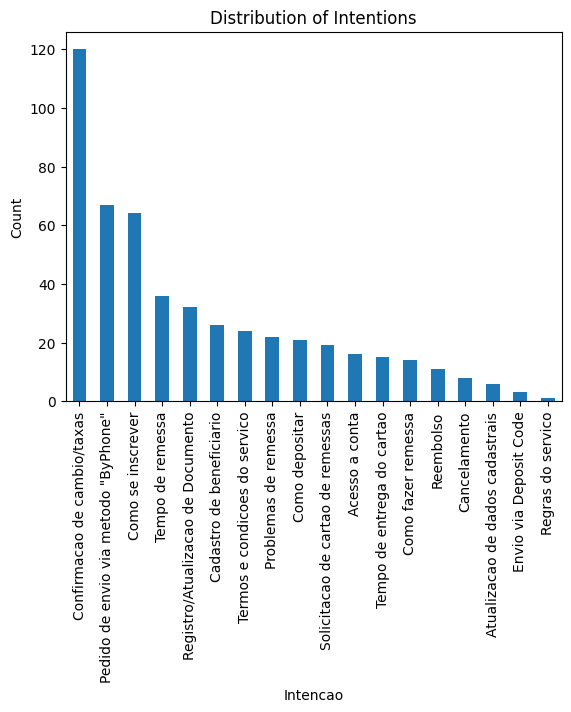

In [171]:
import matplotlib.pyplot as plt

df['Intencao'].value_counts().plot(kind='bar')
plt.xlabel('Intencao')
plt.ylabel('Count')
_ = plt.title('Distribution of Intentions')

#Defini√ß√£o de fun√ß√µes de etapas de pr√©-processamento

## lendo base de dados

In [172]:
file_path = CSV_PATH
headers = ["numero", "intencao", "pergunta", "resposta"]
csv_words = pd.read_csv(file_path)
csv_words.shape

(2615, 2)

In [173]:
csv_words = csv_words.dropna().reset_index(drop=True)

csv_words.shape

(2609, 2)

In [174]:
csv_words = csv_words.apply(lambda x: x.str.replace("\n", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\t", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\r", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\f", " ", regex=False) if x.dtype == "object" else x)
csv_words = csv_words.apply(lambda x: x.str.replace("\v", " ", regex=False) if x.dtype == "object" else x)

In [175]:
print(df.shape)
csv_words.head()

(505, 4)


Intencao  \
0                        Como depositar   
1                    Como fazer remessa   
2                      Tempo de remessa   
3  Pedido de envio via metodo "ByPhone"   
4  Pedido de envio via metodo "ByPhone"   

                                            Pergunta  
0  Boa dia.tudo bem?eu gostaria de saber sobre aq...  
1                     Como enviar dinheiro do Jap√£o?  
2  Quanto tempo levar√° para o benefici√°rio recebe...  
3  Boa tarde Acabei de fazer a transfer√™ncia de 2...  
4  Poderia fazer a remessa de 22yenes para o BBB ...

## Definindo fun√ß√µes para o pr√©-processamento

In [176]:
import spacy
import string

nlp = spacy.load('pt_core_news_sm')

def segmentar(texto):
    """Segmenta o texto em senten√ßas."""
    doc = nlp(texto)
    return [sent.text for sent in doc.sents]

def tokenizar(texto):
    """Tokeniza o texto em palavras."""
    doc = nlp(texto)
    return [token.text for token in doc]

def lematizar(tokens):
    """Lemmatiza tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

def stemming(tokens):
    """Aplica stemming aos tokens usando spaCy (n√£o h√° stemming nativo, mas podemos usar lematiza√ß√£o)."""
    return lematizar(tokens)  # SpaCy n√£o tem um stemmer, ent√£o usamos lematiza√ß√£o.

def remover_stopwords(tokens):
    """Remove stopwords dos tokens."""
    stop_words = set(nlp.Defaults.stop_words)
    return [word for word in tokens if word.lower() not in stop_words]

def pos_tagging(tokens):
    """Realiza POS tagging nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [(token.text, token.pos_) for token in doc]

def remover_pontuacao(tokens):
    """Remove pontua√ß√£o dos tokens."""
    return [token for token in tokens if token not in string.punctuation]

def reconhecimento_entidades_nomeadas(tokens):
    """Reconhece entidades nomeadas nos tokens usando spaCy."""
    doc = nlp(" ".join(tokens))
    return [(ent.text, ent.label_) for ent in doc.ents]


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


## Testes das fun√ß√µes de pr√©-processamento

In [177]:
# Texto de exemplo
texto = "O Leandro comprou um carro novo. Ele est√° muito feliz com a nova aquisi√ß√£o!"

In [178]:
# Teste da fun√ß√£o segmentar
resultado_esperado_segmentar = ['O Leandro comprou um carro novo.', 'Ele est√° muito feliz com a nova aquisi√ß√£o!']
resultado_obtido_segmentar = segmentar(texto)
assert resultado_obtido_segmentar == resultado_esperado_segmentar, f"Erro no teste de segmenta√ß√£o. Esperado: {resultado_esperado_segmentar}, Obtido: {resultado_obtido_segmentar}"
print("Teste de segmenta√ß√£o passou!")

Teste de segmenta√ß√£o passou!


In [179]:
# Teste da fun√ß√£o tokenizar
resultado_esperado_tokenizar = ['O', 'Leandro', 'comprou', 'um', 'carro', 'novo', '.', 'Ele', 'est√°', 'muito', 'feliz', 'com', 'a', 'nova', 'aquisi√ß√£o', '!']
resultado_obtido_tokenizar = tokenizar(texto)
assert resultado_obtido_tokenizar == resultado_esperado_tokenizar, f"Erro no teste de tokeniza√ß√£o. Esperado: {resultado_esperado_tokenizar}, Obtido: {resultado_obtido_tokenizar}"
print("Teste de tokeniza√ß√£o passou!")

Teste de tokeniza√ß√£o passou!


In [180]:
# Teste da fun√ß√£o lematizar
tokens_exemplo = ['Leandro', 'comprou', 'carros']
resultado_esperado_lematizar = ['Leandro', 'comprar', 'carro']
resultado_obtido_lematizar = lematizar(tokens_exemplo)
assert resultado_obtido_lematizar == resultado_esperado_lematizar, f"Erro no teste de lematiza√ß√£o. Esperado: {resultado_esperado_lematizar}, Obtido: {resultado_obtido_lematizar}"
print("Teste de lematiza√ß√£o passou!")

Teste de lematiza√ß√£o passou!


In [181]:
# Teste da fun√ß√£o stemming
resultado_esperado_stemming = ['Leandro', 'comprar', 'carro']
resultado_obtido_stemming = stemming(tokens_exemplo)
assert resultado_obtido_stemming == resultado_esperado_stemming, f"Erro no teste de stemming. Esperado: {resultado_esperado_stemming}, Obtido: {resultado_obtido_stemming}"
print("Teste de stemming passou!")

Teste de stemming passou!


In [182]:
# Teste da fun√ß√£o remover_stopwords
resultado_esperado_remover_stopwords = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_stopwords = remover_stopwords(tokens_exemplo)
assert resultado_obtido_remover_stopwords == resultado_esperado_remover_stopwords, f"Erro no teste de remo√ß√£o de stopwords. Esperado: {resultado_esperado_remover_stopwords}, Obtido: {resultado_obtido_remover_stopwords}"
print("Teste de remo√ß√£o de stopwords passou!")

Teste de remo√ß√£o de stopwords passou!


In [183]:
# Teste da fun√ß√£o pos_tagging
resultado_esperado_pos_tagging = [('Leandro', 'PROPN'), ('comprou', 'VERB'), ('carros', 'NOUN')]
resultado_obtido_pos_tagging = pos_tagging(tokens_exemplo)
assert resultado_obtido_pos_tagging == resultado_esperado_pos_tagging, f"Erro no teste de POS tagging. Esperado: {resultado_esperado_pos_tagging}, Obtido: {resultado_obtido_pos_tagging}"
print("Teste de POS tagging passou!")

Teste de POS tagging passou!


In [184]:
# Teste da fun√ß√£o remover_pontuacao
tokens_com_pontuacao = ['Leandro', ',', 'comprou', 'carros', '.']
resultado_esperado_remover_pontuacao = ['Leandro', 'comprou', 'carros']
resultado_obtido_remover_pontuacao = remover_pontuacao(tokens_com_pontuacao)
assert resultado_obtido_remover_pontuacao == resultado_esperado_remover_pontuacao, f"Erro no teste de remo√ß√£o de pontua√ß√£o. Esperado: {resultado_esperado_remover_pontuacao}, Obtido: {resultado_obtido_remover_pontuacao}"
print("Teste de remo√ß√£o de pontua√ß√£o passou!")

Teste de remo√ß√£o de pontua√ß√£o passou!


In [185]:
# Teste da fun√ß√£o reconhecimento_entidades_nomeadas
resultado_esperado_reconhecimento_entidades = [('Leandro', 'PER')]
resultado_obtido_reconhecimento_entidades = reconhecimento_entidades_nomeadas(tokens_exemplo)
assert resultado_obtido_reconhecimento_entidades == resultado_esperado_reconhecimento_entidades, f"Erro no teste de reconhecimento de entidades nomeadas. Esperado: {resultado_esperado_reconhecimento_entidades}, Obtido: {resultado_obtido_reconhecimento_entidades}"
print("Teste de reconhecimento de entidades nomeadas passou!")

Teste de reconhecimento de entidades nomeadas passou!


#Uso de Pipeline de pr√©-processamento

## Defini√ß√£o da Pipeline

In [186]:
def pipeline_preprocessamento(texto, intencao, aplicar_segmentacao=True, aplicar_tokenizacao=True, aplicar_lematizacao=True,
                              aplicar_stemming=True, aplicar_remocao_stopwords=True, aplicar_pos_tagging=True,
                              aplicar_reconhecimento_entidades=True, aplicar_remocao_pontuacao=True):

    used_random_numbers = set()

    resultados = []

    sentencaIndex = 0
    for sentenca in texto:

        output = {'Sentenca Original': sentenca}

        if aplicar_tokenizacao:
            tokens = tokenizar(sentenca)

        if aplicar_lematizacao:
            tokens = lematizar(tokens)

        if aplicar_reconhecimento_entidades:
            entidades = reconhecimento_entidades_nomeadas(tokens)
            named_entity_tokens = {entity[0] for entity in entidades}
        else:
            named_entity_tokens = set()

        if aplicar_remocao_pontuacao:
            tokens = remover_pontuacao(tokens)

        if aplicar_remocao_stopwords:
            tokens = remover_stopwords(tokens)

        if aplicar_pos_tagging:
            pos_tags = pos_tagging(tokens)
            pos_tag_dict = {word: tag for word, tag in pos_tags}
        else:
            pos_tag_dict = {}

        if aplicar_stemming:
            stemmed_tokens = stemming(tokens)

        sentence_counter = Counter(tokens)

        seen_tokens = set()
        combined_info = []
        for stem, token in zip(stemmed_tokens, tokens):
            if token not in seen_tokens:
                seen_tokens.add(token)
                is_named = True if token in named_entity_tokens else False
                pos = pos_tag_dict.get(token, "None")
                sentence_count = sentence_counter[token]


                combined_info.append([stem, is_named, pos, sentence_count, sentencaIndex, intencao[sentencaIndex]])

        sentencaIndex = sentencaIndex + 1
        output['words'] = combined_info
        resultados.append(output)

    return resultados

## Lendo perguntas da base de dados para realiza√ß√£o de testes

In [187]:
csv_words.columns


Index(['Intencao', 'Pergunta'], dtype='object')

In [188]:
csv_words['Pergunta'].head()

0    Boa dia.tudo bem?eu gostaria de saber sobre aq...
1                       Como enviar dinheiro do Jap√£o?
2    Quanto tempo levar√° para o benefici√°rio recebe...
3    Boa tarde Acabei de fazer a transfer√™ncia de 2...
4    Poderia fazer a remessa de 22yenes para o BBB ...
Name: Pergunta, dtype: object

## Execu√ß√£o da pipeline

In [189]:
csv_words.iloc[630:680]

Intencao  \
630                      Termos e condicoes do servico   
631                   Problemas/Duvidas sobre deposito   
632                         Tempo de entrega do cartao   
633                           Cadastro de beneficiario   
634  Problemas/Duvidas de atualizacao de dados cada...   
635               Pedido de envio via metodo "ByPhone"   
636                   Problemas/Duvidas sobre remessas   
637  Problemas/Duvidas de atualizacao de dados cada...   
638                   Problemas/Duvidas sobre remessas   
639                   Problemas/Duvidas sobre remessas   
640                                  Como se inscrever   
641  Problemas/Duvidas de atualizacao de dados cada...   
642                   Problemas/Duvidas sobre remessas   
643                                  Como se inscrever   
644               Pedido de envio via metodo "ByPhone"   
645                           Cadastro de beneficiario   
646               Pedido de envio via metodo "ByPhone"   
647                   Problemas/Duvidas sobre deposito   
648               Pedido de envio via metodo "ByPhone"   
649                                   Tempo de remessa   
650               Pedido de envio via metodo "ByPhone"   
651                                       Cancelamento   
652                   Problemas/Duvidas sobre remessas   
653               Pedido de envio via metodo "ByPhone"   
654                   Problemas/Duvidas sobre remessas   
655                   Problemas/Duvidas sobre remessas   
656                           Cadastro de beneficiario   
657                   Problemas/Duvidas sobre remessas   
658                         Tempo de entrega do cartao   
659                   Problemas/Duvidas sobre deposito   
660                  Solicitacao de cartao de remessas   
661                   Problemas/Duvidas sobre remessas   
662  Problemas/Duvidas de atualizacao de dados cada...   
663                   Problemas/Duvidas sobre deposito   
664               Pedido de envio via metodo "ByPhone"   
665                  Solicitacao de cartao de remessas   
666               Pedido de envio via metodo "ByPhone"   
667               Pedido de envio via metodo "ByPhone"   
668                   Problemas/Duvidas sobre remessas   
669  Problemas/Duvidas de atualizacao de dados cada...   
670               Pedido de envio via metodo "ByPhone"   
671                   Problemas/Duvidas sobre remessas   
672                                       Cancelamento   
673                  Solicitacao de cartao de remessas   
674                   Problemas/Duvidas sobre remessas   
675                   Problemas/Duvidas sobre remessas   
676                                       Cancelamento   
677                   Problemas/Duvidas sobre remessas   
678                  Solicitacao de cartao de remessas   
679               Pedido de envio via metodo "ByPhone"   

                                              Pergunta  
630  Como eu fa√ßo pra depositar do meu cart√£o pra c...  
631  Bom dia, n√£o consegui depositar dinheiro usand...  
632                       sim Presciso do cart√£o verde  
633  O d√≠gito final est√° diferente estranho q fiz v...  
634  Bom dia , estou recebendo uma mensagem que meu...  
635  Bom dia! Ap√≥s a confirma√ß√£o do meu dep√≥sito qu...  
636  ola boa tarde entao eu fiz uma remessa de gran...  
637  Recebi uma mensagem para reenviar frente e ver...  
638  Eu enviei um dinheiro mas ainda n√£o caiu na co...  
639                         Brastel d√° para mandar pix  
640  Como fa√ßo para pagar uma pessoa no Brasil üáßüá∑ c...  
641  Breve estarei atualizando meus documentos e fa...  
642  Bom dia ‚òÄÔ∏è Fiz uma remessa no s√°bado e n√£o cai...  
643  Como enviar dinheiro do Jap√£o? Como posso me i...  
644  Bom dia fiz um dep√≥sito de 250.000 yens vc dep...  
645               Gostaria de cadastrar uma nova conta  
646  Boa tarde!! Fiz um dep√≥sito hj de 65 mil e gos...  
647  Bom dia. Quanto tempo demora

In [190]:
resultados = pipeline_preprocessamento(csv_words["Pergunta"], csv_words["Intencao"])

df_resultados = pd.DataFrame(resultados)

df_resultados

Sentenca Original  \
0     Boa dia.tudo bem?eu gostaria de saber sobre aq...   
1                        Como enviar dinheiro do Jap√£o?   
2     Quanto tempo levar√° para o benefici√°rio recebe...   
3     Boa tarde Acabei de fazer a transfer√™ncia de 2...   
4     Poderia fazer a remessa de 22yenes para o BBB ...   
...                                                 ...   
2604  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   
2605  1. 'Recebi o aplicativo, por√©m ele n√£o inicia ...   
2606  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   
2607  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   
2608  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   

                                                  words  
0     [[dia.tudo, False, ADJ, 1, 0, Como depositar],...  
1     [[enviar, False, VERB, 1, 1, Como fazer remess...  
2     [[levar, False, VERB, 1, 2, Tempo de remessa],...  
3     [[Acabei, True, PROPN, 1, 3, Pedido de envio v...  
4     [[poderiar, False, VERB, 1, 4, Pedido de envio...  
...                                                 ...  
2604  [[1, False, NUM, 1, 2604, Dificuldades com uti...  
2605  [[1, False, NUM, 1, 2605, Dificuldades com uti...  
2606  [[1, False, NUM, 1, 2606, Dificuldades com uti...  
2607  [[1, False, NUM, 1, 2607, Dificuldades com uti...  
2608  [[1, False, NUM, 1, 2608, Dificuldades com uti...  

[2609 rows x 2 columns]

## Exibi√ß√£o de resultados obtidos

In [191]:
resultados

[{'Sentenca Original': 'Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado',
  'words': [['dia.tudo', False, 'ADJ', 1, 0, 'Como depositar'],
   ['bem?eu', False, 'ADJ', 1, 0, 'Como depositar'],
   ['gostar', False, 'VERB', 1, 0, 'Como depositar'],
   ['caixa', False, 'NOUN', 1, 0, 'Como depositar'],
   ['de', False, 'None', 1, 0, 'Como depositar'],
   ['o', False, 'NOUN', 1, 0, 'Como depositar'],
   ['family', False, 'PROPN', 1, 0, 'Como depositar'],
   ['Mart', False, 'ADJ', 1, 0, 'Como depositar'],
   ['verde', False, 'ADP', 1, 0, 'Como depositar'],
   ['eh', False, 'NUM', 1, 0, 'Como depositar'],
   ['24', True, 'PROPN', 1, 0, 'Como depositar'],
   ['horas?e', False, 'VERB', 1, 0, 'Como depositar'],
   ['transferir', False, 'VERB', 1, 0, 'Como depositar']]},
 {'Sentenca Original': 'Como enviar dinheiro do Jap√£o?',
  'words': [['enviar', False, 'VERB', 1, 1, 'Como fazer remessa'],
   ['dinheiro'

In [192]:
for resultado in resultados[:5]:
    print(f"Sentence: {resultado['Sentenca Original']}")
    print("Words:")
    for word_info in resultado['words']:
        print(word_info)
    print("____________________________________________________________________________________________________")

Sentence: Boa dia.tudo bem?eu gostaria de saber sobre aquele caixa do family mart verde eh 24 horas?e se eu posso transferir a qualquer hora?obrigado
Words:
['dia.tudo', False, 'ADJ', 1, 0, 'Como depositar']
['bem?eu', False, 'ADJ', 1, 0, 'Como depositar']
['gostar', False, 'VERB', 1, 0, 'Como depositar']
['caixa', False, 'NOUN', 1, 0, 'Como depositar']
['de', False, 'None', 1, 0, 'Como depositar']
['o', False, 'NOUN', 1, 0, 'Como depositar']
['family', False, 'PROPN', 1, 0, 'Como depositar']
['Mart', False, 'ADJ', 1, 0, 'Como depositar']
['verde', False, 'ADP', 1, 0, 'Como depositar']
['eh', False, 'NUM', 1, 0, 'Como depositar']
['24', True, 'PROPN', 1, 0, 'Como depositar']
['horas?e', False, 'VERB', 1, 0, 'Como depositar']
['transferir', False, 'VERB', 1, 0, 'Como depositar']
____________________________________________________________________________________________________
Sentence: Como enviar dinheiro do Jap√£o?
Words:
['enviar', False, 'VERB', 1, 1, 'Como fazer remessa']
['dinhe

In [193]:
data = []
for resultado in resultados:
    sentence = resultado['Sentenca Original']
    for word_info in resultado['words']:
        data.append({
            'Sentenca Original': sentence,
            'stemmed': word_info[0],
            'ent_nomeada': word_info[1],
            'pos_tagging': word_info[2],
            'ocorrencias': word_info[3],
            'id_sentenca': word_info[4],
            'intencao': word_info[5]
        })

df = pd.DataFrame(data)

display(df)

Sentenca Original   stemmed  \
0      Boa dia.tudo bem?eu gostaria de saber sobre aq...  dia.tudo   
1      Boa dia.tudo bem?eu gostaria de saber sobre aq...    bem?eu   
2      Boa dia.tudo bem?eu gostaria de saber sobre aq...    gostar   
3      Boa dia.tudo bem?eu gostaria de saber sobre aq...     caixa   
4      Boa dia.tudo bem?eu gostaria de saber sobre aq...        de   
...                                                  ...       ...   
43840  1. Recebi o aplicativo, por√©m ele n√£o inicia a...    antigo   
43841  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   mostrar   
43842  1. Recebi o aplicativo, por√©m ele n√£o inicia a...    seguir   
43843  1. Recebi o aplicativo, por√©m ele n√£o inicia a...         3   
43844  1. Recebi o aplicativo, por√©m ele n√£o inicia a...     aplic   

       ent_nomeada pos_tagging  ocorrencias  id_sentenca  \
0            False         ADJ            1            0   
1            False         ADJ            1            0   
2            False        VERB            1            0   
3            False        NOUN            1            0   
4            False        None            1            0   
...            ...         ...          ...          ...   
43840        False         ADJ            1         2608   
43841        False        VERB            1         2608   
43842        False        VERB            1         2608   
43843        False         NUM            1         2608   
43844        False         ADJ            1         2608   

                                 intencao  
0                          Como depositar  
1                          Como depositar  
2                          Como depositar  
3                          Como depositar  
4                          Como depositar  
...                                   ...  
43840  Dificuldades com utilizacao do App  
43841  Dificuldades com utilizacao do App  
43842  Dificuldades com utilizacao do App  
43843  Dificuldades com utilizacao do App  
43844  Dificuldades com utilizacao do App  

[43845 rows x 7 columns]

In [194]:
df.describe()

ocorrencias   id_sentenca
count  43845.000000  43845.000000
mean       1.411837   1478.690957
std        0.909464    675.061862
min        1.000000      0.000000
25%        1.000000    959.000000
50%        1.000000   1512.000000
75%        1.000000   2034.000000
max       10.000000   2608.000000

In [195]:
df.columns

Index(['Sentenca Original', 'stemmed', 'ent_nomeada', 'pos_tagging',
       'ocorrencias', 'id_sentenca', 'intencao'],
      dtype='object')

In [196]:
df['intencao'].unique()

array(['Como depositar', 'Como fazer remessa', 'Tempo de remessa',
       'Pedido de envio via metodo "ByPhone"', 'Como se inscrever',
       'Confirmacao de cambio/taxas', 'Envio via Deposit Code',
       'Registro/Atualizacao de Documento',
       'Solicitacao de cartao de remessas', 'Cadastro de beneficiario',
       'Acesso a conta', 'Termos e condicoes do servico',
       'Problemas de remessa', 'Tempo de entrega do cartao', 'Reembolso',
       'Regras do servico', 'Atualizacao de dados cadastrais',
       'Cancelamento', 'Problemas/Duvidas sobre deposito',
       'Problemas/Duvidas de atualizacao de dados cadastrais',
       'Problemas/Duvidas sobre remessas',
       'Dificuldades com utilizacao do App'], dtype=object)

In [197]:
df_copy = df.copy()

In [198]:
if DOWNLOAD_DF:
  df.to_csv('my_data.csv', index=False)

  files.download('my_data.csv')

## Testes de valida√ß√£o de Pipeline

In [199]:
def validate_word_info(word_info):
    """
    Este teste tem como objetivo realizar a valida√ß√£o dos arrays de resposta obtidos na pipe

    resultados esperados [String, Boolean, String, Int, Int]
    """
    if len(word_info) != 6:
        print(f"Tamanho de resposta errado: {word_info}")
        return False

    if not isinstance(word_info[0], str):
        print(f"Elemento de √≠ndice '0' deve ser do tipo 'String': {word_info}")
        return False

    if not isinstance(word_info[1], bool):
        print(f"Elemento de √≠ndice '1' deve ser do tipo 'Boolean': {word_info}")
        return False

    if not (word_info[2] is None or isinstance(word_info[2], str)):
        print(f"Elemento de √≠ndice '2' deve ser do tipo 'String: {word_info}")
        return False

    if not isinstance(word_info[3], int):
        print(f"Elemento de √≠ndice '3' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[4], int):
        print(f"Elemento de √≠ndice '4' deve ser do tipo 'Integer': {word_info}")
        return False

    if not isinstance(word_info[5], str):
        print(f"Elemento de √≠ndice '5' deve ser do tipo 'String': {word_info}")
        return False

    return True

def validate_results(resultados):
    all_valid = True
    for resultado in resultados:
        for word_info in resultado['words']:
            if not validate_word_info(word_info):
                all_valid = False
    return all_valid

is_valid = validate_results(resultados)
print(f"Os arrays s√£o v√°lidos? {is_valid}")


Os arrays s√£o v√°lidos? True


In [200]:
def testar_pipeline():
    """
    Este teste tem como objetivo a compara√ß√£o entre resultados obtidos e esperados na execu√ß√£o da pipeline.
    """

    INPUT = ["O Leandro comprou um carro novo.", "Ele est√° muito feliz com a nova aquisi√ß√£o!"]
    INTENCAO = ["compra", "felicidade"]

    # Somente os campos est√°veis s√£o inclu√≠dos no resultado esperado
    result_esperado = [
        [
            ['Leandro', True, 'PROPN', 1],
            ['comprar', False, 'VERB', 1],
            ['carro', False, 'NOUN', 1],
        ],
        [
            ['feliz', False, 'ADJ', 1],
            ['aquisi√ß√£o', False, 'NOUN', 1]
        ]
    ]

    result_obtido = pipeline_preprocessamento(INPUT, INTENCAO)

    sucesso = True

    result_obtido = pipeline_preprocessamento(INPUT, INTENCAO)

    sucesso = True

    print("ü§ñ Iniciando testes de pipeline... ü§ñ")
    print("____________________________________________________________________________________________________")

    print("Resultados obtidos:")
    for i, r in enumerate(result_obtido):
        print(f"Senten√ßa {i}: {r}")

    # Compare apenas quando result_obtido e result_esperado t√™m a mesma estrutura
    for s_idx in range(len(result_obtido)):
        if s_idx < len(result_esperado):
            for i in range(len(result_obtido[s_idx]['words'])):
                try:
                    obtido = result_obtido[s_idx]['words'][i][:4]  # Pegando os primeiros quatro elementos
                    esperado = result_esperado[s_idx][i]
                    print(f"Comparando: obtido='{obtido}', esperado='{esperado}'")
                    assert obtido == esperado
                    print("‚úÖ")
                except AssertionError:
                    print("‚ùå")
                    sucesso = False
                except IndexError:
                    print(f"‚ùå √çndice fora do intervalo para a senten√ßa {s_idx} e √≠ndice {i}.")
                    sucesso = False
                print("____________________________________________________________________________________________________")

    if sucesso:
        print("üëç Todos os testes passaram!")
    else:
        print("üëé Teste falhou!")

testar_pipeline()



ü§ñ Iniciando testes de pipeline... ü§ñ
____________________________________________________________________________________________________
Resultados obtidos:
Senten√ßa 0: {'Sentenca Original': 'O Leandro comprou um carro novo.', 'words': [['Leandro', True, 'PROPN', 1, 0, 'compra'], ['comprar', False, 'VERB', 1, 0, 'compra'], ['carro', False, 'NOUN', 1, 0, 'compra']]}
Senten√ßa 1: {'Sentenca Original': 'Ele est√° muito feliz com a nova aquisi√ß√£o!', 'words': [['feliz', False, 'ADJ', 1, 1, 'felicidade'], ['aquisi√ß√£o', False, 'NOUN', 1, 1, 'felicidade']]}
Comparando: obtido='['Leandro', True, 'PROPN', 1]', esperado='['Leandro', True, 'PROPN', 1]'
‚úÖ
____________________________________________________________________________________________________
Comparando: obtido='['comprar', False, 'VERB', 1]', esperado='['comprar', False, 'VERB', 1]'
‚úÖ
____________________________________________________________________________________________________
Comparando: obtido='['carro', False, 

In [201]:
# Inicializa√ß√£o vari√°vel de contagem do tempo para CPU ou GPU
start_time = time.time()

# Bag of Words

## Defini√ß√£o de fun√ß√£o de vetoriza√ß√£o Bag of Words (BoW)

In [202]:
df.head()

Sentenca Original   stemmed  ent_nomeada  \
0  Boa dia.tudo bem?eu gostaria de saber sobre aq...  dia.tudo        False   
1  Boa dia.tudo bem?eu gostaria de saber sobre aq...    bem?eu        False   
2  Boa dia.tudo bem?eu gostaria de saber sobre aq...    gostar        False   
3  Boa dia.tudo bem?eu gostaria de saber sobre aq...     caixa        False   
4  Boa dia.tudo bem?eu gostaria de saber sobre aq...        de        False   

  pos_tagging  ocorrencias  id_sentenca        intencao  
0         ADJ            1            0  Como depositar  
1         ADJ            1            0  Como depositar  
2        VERB            1            0  Como depositar  
3        NOUN            1            0  Como depositar  
4        None            1            0  Como depositar

In [203]:
df.columns

Index(['Sentenca Original', 'stemmed', 'ent_nomeada', 'pos_tagging',
       'ocorrencias', 'id_sentenca', 'intencao'],
      dtype='object')

In [204]:
if 'intencao' in df.columns:
    num_intencoes_diferentes = df['intencao'].nunique()
    print(f"N√∫mero de inten√ß√µes diferentes: {num_intencoes_diferentes}")
else:
    print("Coluna 'intencao' n√£o encontrada no DataFrame.")


N√∫mero de inten√ß√µes diferentes: 22


In [205]:
df

Sentenca Original   stemmed  \
0      Boa dia.tudo bem?eu gostaria de saber sobre aq...  dia.tudo   
1      Boa dia.tudo bem?eu gostaria de saber sobre aq...    bem?eu   
2      Boa dia.tudo bem?eu gostaria de saber sobre aq...    gostar   
3      Boa dia.tudo bem?eu gostaria de saber sobre aq...     caixa   
4      Boa dia.tudo bem?eu gostaria de saber sobre aq...        de   
...                                                  ...       ...   
43840  1. Recebi o aplicativo, por√©m ele n√£o inicia a...    antigo   
43841  1. Recebi o aplicativo, por√©m ele n√£o inicia a...   mostrar   
43842  1. Recebi o aplicativo, por√©m ele n√£o inicia a...    seguir   
43843  1. Recebi o aplicativo, por√©m ele n√£o inicia a...         3   
43844  1. Recebi o aplicativo, por√©m ele n√£o inicia a...     aplic   

       ent_nomeada pos_tagging  ocorrencias  id_sentenca  \
0            False         ADJ            1            0   
1            False         ADJ            1            0   
2            False        VERB            1            0   
3            False        NOUN            1            0   
4            False        None            1            0   
...            ...         ...          ...          ...   
43840        False         ADJ            1         2608   
43841        False        VERB            1         2608   
43842        False        VERB            1         2608   
43843        False         NUM            1         2608   
43844        False         ADJ            1         2608   

                                 intencao  
0                          Como depositar  
1                          Como depositar  
2                          Como depositar  
3                          Como depositar  
4                          Como depositar  
...                                   ...  
43840  Dificuldades com utilizacao do App  
43841  Dificuldades com utilizacao do App  
43842  Dificuldades com utilizacao do App  
43843  Dificuldades com utilizacao do App  
43844  Dificuldades com utilizacao do App  

[43845 rows x 7 columns]

In [206]:
from collections import defaultdict

word_to_index = defaultdict(lambda: len(word_to_index))

def transform_to_indices(text):
    return [word_to_index[word] for word in text.split()]

df['stemmed_indices'] = df['stemmed'].apply(transform_to_indices)

max_length = df['stemmed_indices'].apply(len).max()
indices_matrix = pd.DataFrame(
    [indices + [0] * (max_length - len(indices)) for indices in df['stemmed_indices']],
    columns=[f'word_{i}' for i in range(max_length)]
)

encoder = OneHotEncoder(sparse_output=False)
X_pos_tagging = encoder.fit_transform(df[['pos_tagging']])
X_pos_tagging_df = pd.DataFrame(X_pos_tagging, columns=encoder.get_feature_names_out())

df['ent_nomeada'] = df['ent_nomeada'].astype(int)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['intencao'] = label_encoder.fit_transform(df['intencao'])

df_numeric = pd.concat([
    indices_matrix,
    X_pos_tagging_df,
    df[['ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao']]
], axis=1)

In [207]:
# Exibir a inten√ß√£o e seu respectivo valor num√©rico
intencao_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Imprimir as inten√ß√µes e seus valores num√©ricos
for texto, valor in intencao_mapping.items():
    print(f'Inten√ß√£o: "{texto}" - Valor num√©rico: {valor}')

Inten√ß√£o: "Acesso a conta" - Valor num√©rico: 0
Inten√ß√£o: "Atualizacao de dados cadastrais" - Valor num√©rico: 1
Inten√ß√£o: "Cadastro de beneficiario" - Valor num√©rico: 2
Inten√ß√£o: "Cancelamento" - Valor num√©rico: 3
Inten√ß√£o: "Como depositar" - Valor num√©rico: 4
Inten√ß√£o: "Como fazer remessa" - Valor num√©rico: 5
Inten√ß√£o: "Como se inscrever" - Valor num√©rico: 6
Inten√ß√£o: "Confirmacao de cambio/taxas" - Valor num√©rico: 7
Inten√ß√£o: "Dificuldades com utilizacao do App" - Valor num√©rico: 8
Inten√ß√£o: "Envio via Deposit Code" - Valor num√©rico: 9
Inten√ß√£o: "Pedido de envio via metodo "ByPhone"" - Valor num√©rico: 10
Inten√ß√£o: "Problemas de remessa" - Valor num√©rico: 11
Inten√ß√£o: "Problemas/Duvidas de atualizacao de dados cadastrais" - Valor num√©rico: 12
Inten√ß√£o: "Problemas/Duvidas sobre deposito" - Valor num√©rico: 13
Inten√ß√£o: "Problemas/Duvidas sobre remessas" - Valor num√©rico: 14
Inten√ß√£o: "Reembolso" - Valor num√©rico: 15
Inten√ß√£o: "Registro/At

In [208]:
display(df_numeric)

word_0  word_1  pos_tagging_ADJ  pos_tagging_ADP  pos_tagging_ADV  \
0           0       0              1.0              0.0              0.0   
1           1       0              1.0              0.0              0.0   
2           2       0              0.0              0.0              0.0   
3           3       0              0.0              0.0              0.0   
4           4       0              0.0              0.0              0.0   
...       ...     ...              ...              ...              ...   
43840     853       0              1.0              0.0              0.0   
43841    1232       0              0.0              0.0              0.0   
43842    1409       0              0.0              0.0              0.0   
43843    1089       0              0.0              0.0              0.0   
43844    2137       0              1.0              0.0              0.0   

       pos_tagging_AUX  pos_tagging_CCONJ  pos_tagging_DET  pos_tagging_INTJ  \
0                  0.0                0.0              0.0               0.0   
1                  0.0                0.0              0.0               0.0   
2                  0.0                0.0              0.0               0.0   
3                  0.0                0.0              0.0               0.0   
4                  0.0                0.0              0.0               0.0   
...                ...                ...              ...               ...   
43840              0.0                0.0              0.0               0.0   
43841              0.0                0.0              0.0               0.0   
43842              0.0                0.0              0.0               0.0   
43843              0.0                0.0              0.0               0.0   
43844              0.0                0.0              0.0               0.0   

       pos_tagging_NOUN  ...  pos_tagging_PUNCT  pos_tagging_SCONJ  \
0                   0.0  ...                0.0                0.0   
1                   0.0  ...                0.0                0.0   
2                   0.0  ...                0.0                0.0   
3                   1.0  ...                0.0                0.0   
4                   0.0  ...                0.0                0.0   
...                 ...  ...                ...                ...   
43840               0.0  ...                0.0                0.0   
43841               0.0  ...                0.0                0.0   
43842               0.0  ...                0.0                0.0   
43843               0.0  ...                0.0                0.0   
43844               0.0  ...                0.0                0.0   

       pos_tagging_SPACE  pos_tagging_SYM  pos_tagging_VERB  pos_tagging_X  \
0                    0.0              0.0               0.0            0.0   
1                    0.0              0.0               0.0            0.0   
2                    0.0              0.0               1.0            0.0   
3                    0.0              0.0               0.0            0.0   
4                    0.0              0.0               0.0            0.0   
...                  ...              ...               ...            ...   
43840                0.0              0.0               0.0            0.0   
43841                0.0              0.0               1.0            0.0   
43842                0.0              0.0               1.0            0.0   
43843                0.0              0.0               0.0            0.0   
43844                0.0              0.0               0.0            0.0   

       ent_nomeada  ocorrencias  id_sentenca  intencao  
0                0            1            0         4  
1                0            1            0         4  
2                0            1            0         4  
3                0            1            0         4  
4                0            1            0         4  
...          

In [209]:
df['intencao'].value_counts()

intencao
8     2710
3     2611
5     2355
11    2354
15    2323
20    2188
2     2170
19    2167
4     2167
9     2131
1     2061
16    2046
0     2042
21    1962
13    1961
18    1900
6     1814
14    1749
12    1549
10    1363
17    1334
7      888
Name: count, dtype: int64

## Baixando resultados do BOW

In [210]:
if DOWNLOAD_DF_NUMERIC:
  df_numeric.to_csv('bow.csv', index=False)

  files.download('bow.csv')

## Testes Bag of Words

In [211]:
import pandas as pd

df_one_hot = df_numeric.copy()
df_one_hot = df_one_hot.drop(columns=['word_0', 'ent_nomeada', 'ocorrencias', 'id_sentenca', 'intencao'])

soma_por_linha = df_one_hot.sum(axis=1)

resultado = pd.DataFrame(soma_por_linha, columns=['Soma'])

In [212]:
resultado.value_counts(normalize=True)

Soma  
1.0       0.999749
730.0     0.000091
739.0     0.000068
478.0     0.000046
886.0     0.000023
1999.0    0.000023
Name: proportion, dtype: float64

In [213]:
def contar_ocorrencias(df):
    contagem = {
        '1': (df['Soma'] == 1).sum(),
        '0': (df['Soma'] == 0).sum(),
        '>1': (df['Soma'] > 1).sum()
    }
    return contagem

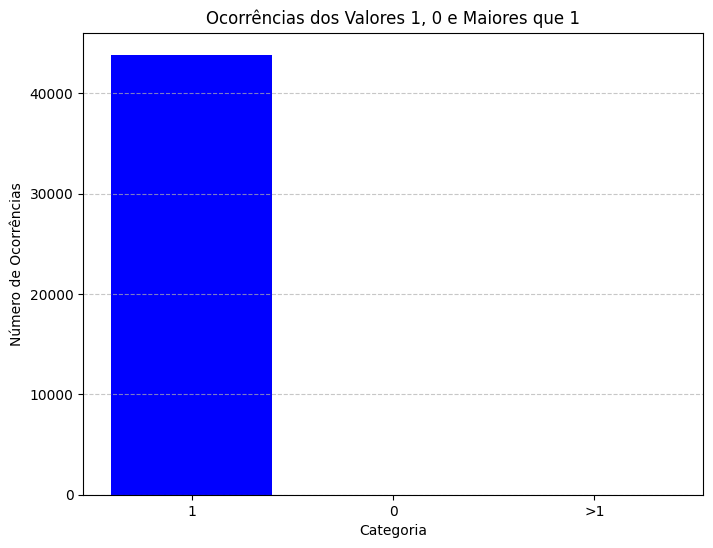

In [214]:
ocorrencias = contar_ocorrencias(resultado)

df_ocorrencias = pd.DataFrame(list(ocorrencias.items()), columns=['Categoria', 'Contagem'])

plt.figure(figsize=(8, 6))
plt.bar(df_ocorrencias['Categoria'], df_ocorrencias['Contagem'], color=['blue', 'red', 'green'])
plt.xlabel('Categoria')
plt.ylabel('N√∫mero de Ocorr√™ncias')
plt.title('Ocorr√™ncias dos Valores 1, 0 e Maiores que 1')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# RNN

## Label Encoder

In [215]:
label_encoder = LabelEncoder()
df_numeric['intencao_encoded'] = label_encoder.fit_transform(df_numeric['intencao'])

## Formata√ß√£o de Dados Para a Rede Neural

In [216]:
grouped = df_numeric.groupby('id_sentenca').agg({
    'word_0': lambda x: list(x),
    'word_1': lambda x: list(x),
    'pos_tagging_ADJ': lambda x: list(x),
    'pos_tagging_ADP': lambda x: list(x),
    'pos_tagging_ADV': lambda x: list(x),
    'pos_tagging_AUX': lambda x: list(x),
    'pos_tagging_CCONJ': lambda x: list(x),
    'pos_tagging_DET': lambda x: list(x),
    'pos_tagging_NOUN': lambda x: list(x),
    'pos_tagging_NUM': lambda x: list(x),
    'pos_tagging_None': lambda x: list(x),
    'pos_tagging_PRON': lambda x: list(x),
    'pos_tagging_PROPN': lambda x: list(x),
    'pos_tagging_PUNCT': lambda x: list(x),
    'pos_tagging_VERB': lambda x: list(x),
    'ent_nomeada': lambda x: list(x),
    'ocorrencias': lambda x: list(x),
    'intencao_encoded': 'first'
}).reset_index()

In [217]:
vocab = list(set(word for sentence in grouped['word_0'] for word in sentence))
word_to_index = {word: i for i, word in enumerate(vocab)}

grouped['palavra_indices'] = grouped['word_0'].apply(lambda words: [word_to_index[word] for word in words])

max_length = max(len(seq) for seq in grouped['palavra_indices'])
X_words = pad_sequences(grouped['palavra_indices'], maxlen=max_length, padding='post')

In [218]:
def prepare_additional_features(grouped_df, max_length):
    features = [
        'word_1', 'pos_tagging_ADJ',
        'pos_tagging_ADP',
        'pos_tagging_ADV',
        'pos_tagging_AUX',
        'pos_tagging_CCONJ',
        'pos_tagging_DET',
        'pos_tagging_NOUN',
        'pos_tagging_NUM',
        'pos_tagging_None',
        'pos_tagging_PRON',
        'pos_tagging_PROPN',
        'pos_tagging_PUNCT',
        'pos_tagging_VERB',
        'ent_nomeada', 'ocorrencias'
    ]

    feature_arrays = []

    for feature in features:
        feature_array = pad_sequences(grouped_df[feature].tolist(), maxlen=max_length, padding='post')
        feature_arrays.append(feature_array)

    return np.stack(feature_arrays, axis=-1)

In [219]:
X_features = prepare_additional_features(grouped, max_length)
y = np.array(grouped['intencao_encoded'])

In [220]:
class AggregateFeatures(Layer):
    def __init__(self, **kwargs):
        super(AggregateFeatures, self).__init__(**kwargs)

    def call(self, inputs):
        words, features = inputs
        aggregated_features = tf.reduce_mean(features, axis=1)
        return tf.concat([words, aggregated_features], axis=-1)

## Defini√ß√£o do Modelo

In [221]:
vocab_size = len(vocab)
embedding_dim = 100
num_classes = len(label_encoder.classes_)
max_length = 100

X_words_padded = pad_sequences(X_words, maxlen=max_length, padding='post')
X_features_padded = pad_sequences(X_features, maxlen=max_length, padding='post')

X_train_words, X_val_words, X_train_features, X_val_features, y_train, y_val = train_test_split(
    X_words_padded, X_features_padded, y, test_size=0.2, random_state=42)

inputs_words = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs_words)

rnn_layer = Bidirectional(LSTM(units=64, return_sequences=False))(embedding_layer)
rnn_layer = Dropout(0.5)(rnn_layer)

inputs_features = Input(shape=(max_length, X_features.shape[-1]))

concat_layer = AggregateFeatures()([rnn_layer, inputs_features])

dense_layer = Dense(32, activation='relu')(concat_layer)

output_layer = Dense(num_classes, activation='softmax')(dense_layer)

model = Model(inputs=[inputs_words, inputs_features], outputs=output_layer)

## Compila√ß√£o do Modelo

In [222]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Early Stop

In [223]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## Treinando Modelo

In [224]:
history = model.fit(
    [X_train_words, X_train_features], y_train,
    validation_data=([X_val_words, X_val_features], y_val),
    epochs=200, batch_size=96, callbacks=[early_stopping], verbose=1
)

Epoch 1/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 58ms/step - accuracy: 0.0498 - loss: 3.0899 - val_accuracy: 0.0632 - val_loss: 3.0930
Epoch 2/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 23ms/step - accuracy: 0.0461 - loss: 3.0888 - val_accuracy: 0.0651 - val_loss: 3.0905
Epoch 3/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - accuracy: 0.0681 - loss: 3.0847 - val_accuracy: 0.0785 - val_loss: 3.0883
Epoch 4/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 16ms/step - accuracy: 0.0870 - loss: 3.0808 - val_accuracy: 0.1437 - val_loss: 3.0852
Epoch 5/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - accuracy: 0.1122 - loss: 3.0784 - val_accuracy: 0.1667 - val_loss: 3.0808
Epoch 6/200
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 17ms/step - accuracy: 0.1544 - loss: 3.0702 - val_accuracy: 0.1609 - val_loss:

## Desempenho do modelo

Como podemos ver no gr√°fico abaixo, a perda de treinamento continua a diminuir enquanto a perda de valida√ß√£o come√ßa a aumentar, isso √© um indicativo de overfitting. O modelo est√° aprendendo os detalhes e ru√≠dos dos dados de treinamento, mas n√£o consegue generalizar para dados n√£o vistos.

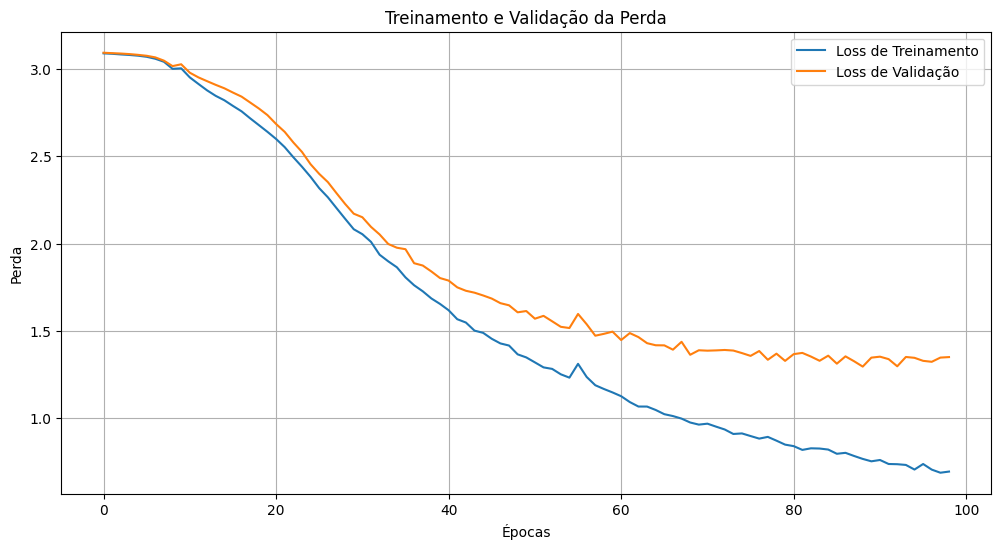

In [225]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss de Treinamento')
plt.plot(history.history['val_loss'], label='Loss de Valida√ß√£o')
plt.title('Treinamento e Valida√ß√£o da Perda')
plt.xlabel('√âpocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

## Predi√ß√£o

17/17 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 28ms/step


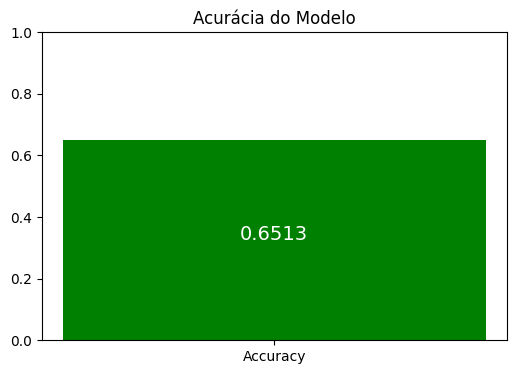

In [226]:
X_words_test_padded = pad_sequences(X_val_words, maxlen=max_length, padding='post')
X_features_test_padded = pad_sequences(X_val_features, maxlen=max_length, padding='post')

predictions = model.predict([X_words_test_padded, X_features_test_padded])
predicted_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_val, predicted_classes)

plt.figure(figsize=(6, 4))
plt.title('Acur√°cia do Modelo')
plt.bar(['Accuracy'], [accuracy], color='green')
plt.ylim(0, 1)
plt.text(0, accuracy / 2, f'{accuracy:.4f}', ha='center', color='white', fontsize=14)
plt.show()

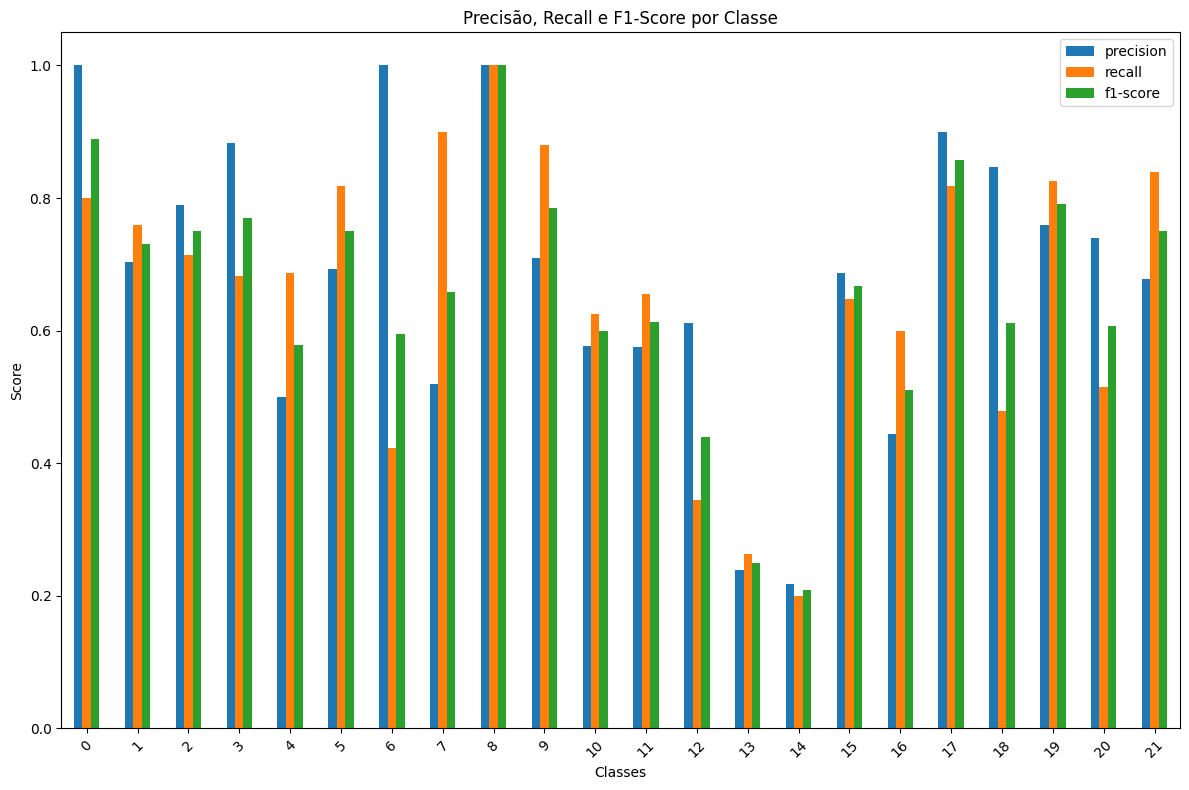

In [227]:
target_names = [str(label) for label in label_encoder.classes_]

classification_rep = classification_report(y_val, predicted_classes, target_names=target_names, output_dict=True)

metrics_df = pd.DataFrame(classification_rep).T[:-3]
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 8))
plt.title('Precis√£o, Recall e F1-Score por Classe')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

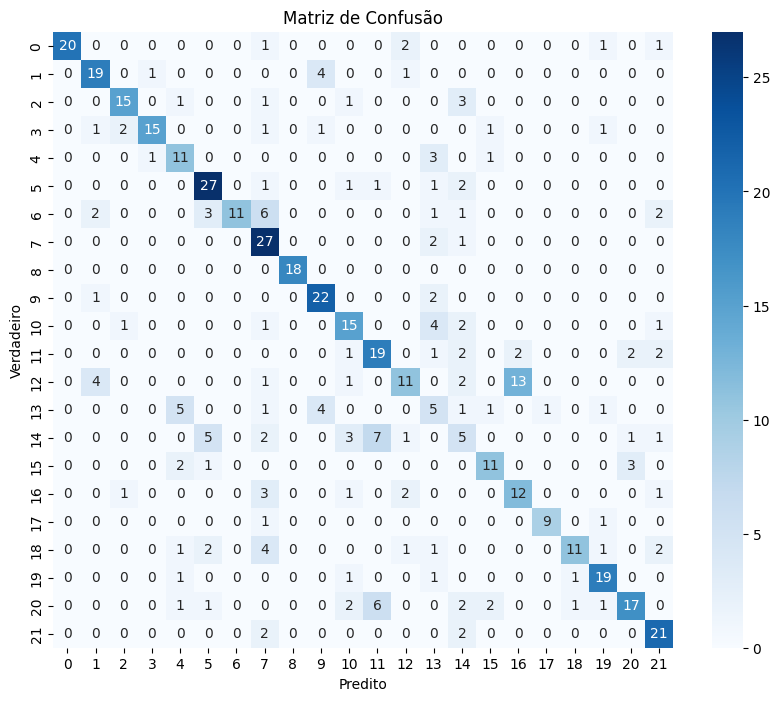

In [228]:
conf_matrix = confusion_matrix(y_val, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confus√£o')
plt.show()

# Save Model

In [229]:
if DOWNLOAD_MODEL:
  model.save('rnn_g1_model.h5')
  files.download('rnn_g1_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### An√°lise da Matriz de Confus√£o

A matriz de confus√£o mostra a performance de um modelo de classifica√ß√£o com 19 classes (de 0 a 18). Aqui est√£o os principais pontos observados:

- **Precis√£o nas Classes**:
  - O modelo apresenta uma boa precis√£o em v√°rias classes, como 0, 2, 6 e 12, onde as previs√µes corretas dominam a diagonal principal.

- **Confus√µes Comuns**:
  - H√° confus√µes significativas entre algumas classes, especialmente:
    - Classe 0 e 1: 17 exemplos de classe 0 foram classificados como 1, e 14 exemplos de classe 1 como 0.
    - Classe 3 e 4: 10 exemplos de classe 3 foram classificados como 4.
    - Classe 14 e 15: Muitas confus√µes entre essas classes consecutivas.

- **Classes com Baixa Performance**:
  - Algumas classes, como 14, 16 e 18, mostram desempenho inferior, com mais confus√µes em rela√ß√£o √†s previs√µes corretas.

- **Tend√™ncias que o grupo observou**:
  - Observa-se uma tend√™ncia de confus√£o entre classes consecutivas, como 0 e 1, 4 e 5, 14 e 15, indicando que o modelo pode ter dificuldades para distinguir essas classes. Talvez pela aus√™ncia de dados dessa categoria no momento de treino.



# An√°lise de execu√ß√£o do modelo com GPU x CPU

Abaixo est√° um marcador de execu√ß√£o de CPU ou GPU, ao executar o modelo, √© incializada uma vari√°vel de tempo at√© o final da execu√ß√£o, abaixo ir√° mostrar o tipo de execu√ß√£o se foi CPU ou GPU e o tempo total de treinamento.

Foram realizados duas execu√ß√µes do modelo, segue abaixo o resultado obtido em cada um:

- CPU: 2.58 segundos
- GPU: 6.11 segundos

## Compara√ß√£o de Resultados

- CPU: Teve um desempenho mais r√°pido, completando a tarefa em menos tempo.
- GPU: Foi mais lenta, possivelmente devido √† sobrecarga de transfer√™ncia de dados, inicializa√ß√£o ou subutiliza√ß√£o em um modelo menor.

Apesar de a GPU normalmente ser mais r√°pida, neste caso, a CPU foi mais eficiente. A escolha entre CPU e GPU deve considerar o tipo de tarefa e a configura√ß√£o do hardware utilizado.

In [230]:
device_name = tf.test.gpu_device_name()
if device_name:
    print("Treinado na GPU:", device_name)
else:
    print("Treinado na CPU")

Treinado na GPU: /device:GPU:0


In [231]:
elapsed_time = time.time() - start_time
print(f"Tempo total de treinamento: {elapsed_time:.2f} segundos")

Tempo total de treinamento: 66.97 segundos


### An√°lise do Tempo de Treinamento do Modelo

Abaixo podemos observar o tempo de treinamento do modelo RNN que foi desenvolvido utilizando CPU e GPU.

Foram feitos 3 testes de tempo do modelo, isso porque o tempo de treinamento pode variar entre execu√ß√µes por v√°rios motivos, como o uso de recursos do sistema, sobrecarga de I/O (entrada e sa√≠da de dados), varia√ß√µes nas aloca√ß√µes de mem√≥ria entre outros fatores externos.

Ao realizar alguns testes conseguimos ter uma maior confian√ßa dos resultados.

Os resultados obtidos foram:

 **1¬∞ Teste:**
Tempo de treinamento com CPU: 60.52 segundos
Tempo de treinamento com GPU: 38.38 segundos

 **2¬∞ Teste:**
Tempo de treinamento com CPU: 43.98 segundos
Tempo de treinamento com GPU: 19.06 segundos

 **3¬∞ Teste:**
Tempo de treinamento com CPU: 44.64 segundos
Tempo de treinamento com GPU: 20.27 segundos


A GPU acabou apresentando os melhores resultadose isso tem como principal raz√£o o fato dela ser projetada para realizar um grande n√∫mero de opera√ß√µes matem√°ticas em paralelo, o que √© primordial para o processamento de redes neurais que envolvem muitas opera√ß√µes matriciais e de vetores.





### Teste 1

In [232]:
def train_and_measure_time(device):
    print(f"\nTraining with {device}...\n")
    with tf.device(device):
        start_time = time.time()
        history = model.fit(
            [X_train_words, X_train_features], y_train,
            validation_data=([X_val_words, X_val_features], y_val),
            epochs=1000, batch_size=96, callbacks=[early_stopping], verbose=1
        )
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Training time with {device}: {elapsed_time:.2f} seconds")
        return elapsed_time

cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 53ms/step - accuracy: 0.7967 - loss: 0.7499 - val_accuracy: 0.6379 - val_loss: 1.3241
Epoch 2/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 42ms/step - accuracy: 0.7937 - loss: 0.7324 - val_accuracy: 0.6456 - val_loss: 1.3034
Epoch 3/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - accuracy: 0.7663 - loss: 0.7794 - val_accuracy: 0.6437 - val_loss: 1.3170
Epoch 4/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 39ms/step - accuracy: 0.7913 - loss: 0.7354 - val_accuracy: 0.6418 - val_loss: 1.3453
Epoch 5/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 38ms/step - accuracy: 0.7946 - loss: 0.7286 - val_accuracy: 0.6418 - val_loss: 1.3037
Epoch 6/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 43ms/step - accuracy: 0.8000 - loss: 0.7019 - 

### Teste 2

In [233]:
cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 46ms/step - accuracy: 0.7716 - loss: 0.7709 - val_accuracy: 0.6398 - val_loss: 1.3428
Epoch 2/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - accuracy: 0.7815 - loss: 0.7600 - val_accuracy: 0.6513 - val_loss: 1.3047
Epoch 3/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - accuracy: 0.8109 - loss: 0.6829 - val_accuracy: 0.6322 - val_loss: 1.3652
Epoch 4/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 37ms/step - accuracy: 0.7994 - loss: 0.7351 - val_accuracy: 0.6379 - val_loss: 1.3398
Epoch 5/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 54ms/step - accuracy: 0.7811 - loss: 0.7335 - val_accuracy: 0.6475 - val_loss: 1.3260
Epoch 6/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 66ms/step - accuracy: 0.7905 - loss: 0.6971 - 

### Teste 3

In [234]:
cpu_time = train_and_measure_time('/CPU:0')
gpu_time = train_and_measure_time('/GPU:0')

print(f"Tempo de treinamento com CPU: {cpu_time:.2f} segundos")
print(f"Tempo de treinamento com GPU: {gpu_time:.2f} segundos")


Training with /CPU:0...

Epoch 1/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 66ms/step - accuracy: 0.7829 - loss: 0.7582 - val_accuracy: 0.6475 - val_loss: 1.3281
Epoch 2/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 75ms/step - accuracy: 0.7784 - loss: 0.7405 - val_accuracy: 0.6303 - val_loss: 1.3496
Epoch 3/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 41ms/step - accuracy: 0.7922 - loss: 0.7229 - val_accuracy: 0.6456 - val_loss: 1.3107
Epoch 4/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 43ms/step - accuracy: 0.8130 - loss: 0.6754 - val_accuracy: 0.6456 - val_loss: 1.3679
Epoch 5/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - accuracy: 0.7898 - loss: 0.7229 - val_accuracy: 0.6418 - val_loss: 1.3274
Epoch 6/1000
22/22 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 40ms/step - accuracy: 0.7886 - loss: 0.7326 - 